# **DBSCAN Parameters**

**Density-Based Spatial Clustering of Applications with Noise**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("dot.csv")
df.head()

,p1,p2
0,14.541182,9.171020
1,15.066288,7.708681
2,12.784097,9.935294
3,11.746347,9.769397
4,5.807864,14.875203


## *Modelling*

In [4]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN()

In [5]:
label = dbscan.fit_predict(df)

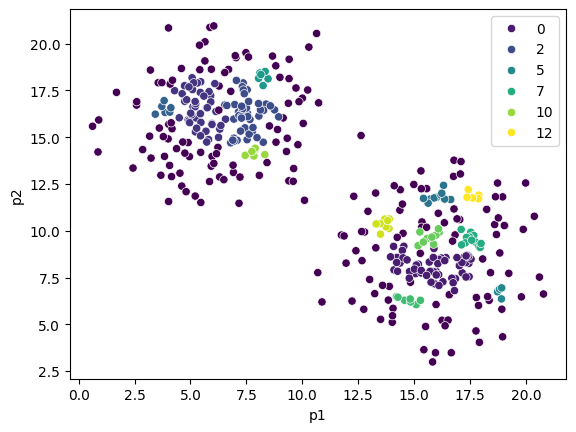

In [6]:
sns.scatterplot(x= "p1", y= "p2", data= df, hue= label, palette= "viridis");

In [12]:
# Infos
print("Labels: ", np.unique(label))
print("Count of outliers: ", sum(dbscan.labels_ == -1))
print("Length of dataframe: ", len(df))


Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Count of outliers:  182
Length of dataframe:  400


## *Parameters*

In [13]:
def cluster(model, data):
    label = model.fit_predict(data)
    sns.scatterplot(x= "p1", y= "p2", data= data, hue= label, palette= "viridis")
    print("Outliers: ", sum(dbscan.labels_ == -1))

**eps = 2**

Outliers:  1


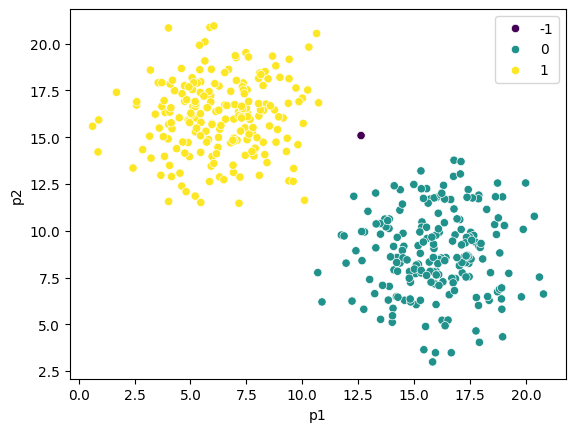

In [14]:
dbscan = DBSCAN(eps= 2)
cluster(dbscan, df)

**eps = 0,15**

Outliers:  400


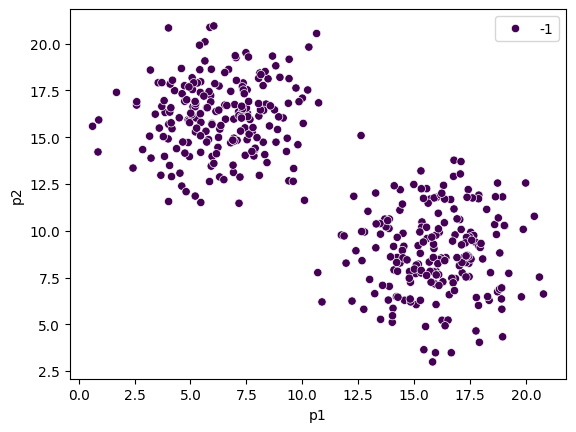

In [16]:
dbscan = DBSCAN(eps= 0.15)
cluster(dbscan, df)

**eps = 10**

Outliers:  0


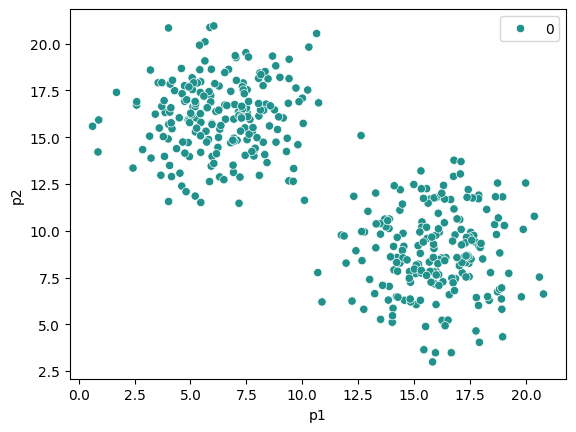

In [18]:
dbscan = DBSCAN(eps= 10)
cluster(dbscan, df)

### **Choosing Ideal eps Value**

In [20]:
percentages = []
num_outlier = []

for eps in np.arange(0.01, 4, 0.01):
    
    dbscan = DBSCAN(eps= eps)
    dbscan.fit(df)

    num_outlier.append(np.sum(dbscan.labels_ == -1))

    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    percentages.append(perc_outliers)

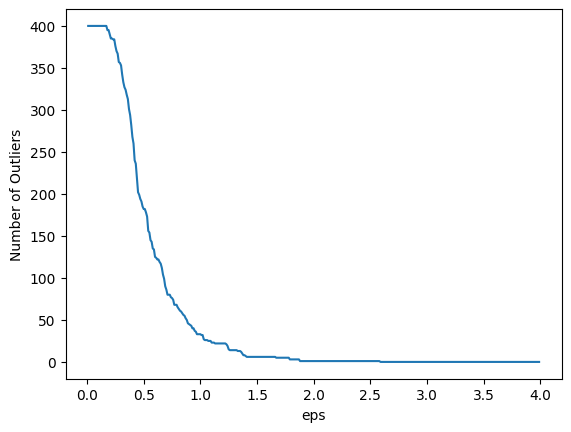

In [26]:
sns.lineplot(x= np.arange(0.01, 4, 0.01), y= num_outlier)
plt.xlabel("eps")
plt.ylabel("Number of Outliers");

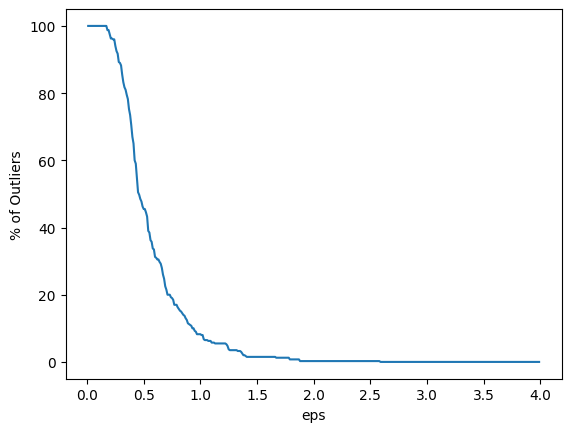

In [32]:
sns.lineplot(x= np.arange(0.01, 4, 0.01), y= percentages)
plt.xlabel("eps")
plt.ylabel("% of Outliers");